<a href="https://colab.research.google.com/github/hulasozdemir/pyTorch/blob/main/PyTorch_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [ ]:
weight = 0.7
bias = 0.3


start = 0.0
end = 1.0
step = 0.02

X = torch.arange(start, end, step)
y = weight * X + bias

In [ ]:
train_split = int(0.8 * len(X))

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test), 

(40, 40, 10, 10)

In [ ]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="c", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

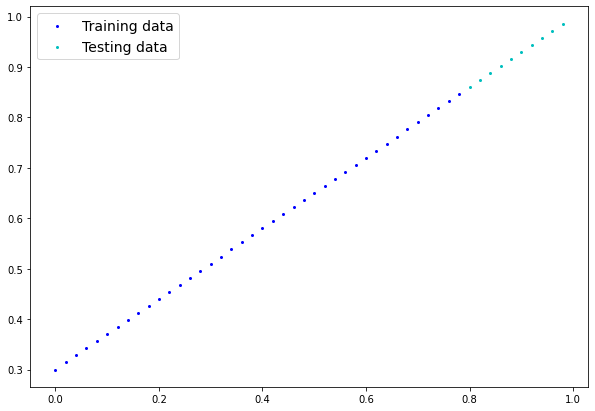

In [ ]:
plot_predictions()

In [ ]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, dtype = torch.float), requires_grad=True)
    self.bias = nn.Parameter(torch.randn(1, dtype = torch.float), requires_grad=True)

  def forward(self, x: torch.tensor) -> torch.tensor:
      return self.weights * x + self.bias

In [ ]:
torch.manual_seed(42)

model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
with torch.inference_mode(): ## Inference mode turns off the components necessary for training ie gradient tracking
  y_preds = model_0(X_test)

In [ ]:
y_preds

tensor([0.3982, 0.4049, 0.4116, 0.4184, 0.4251, 0.4318, 0.4386, 0.4453, 0.4520,
        0.4588])

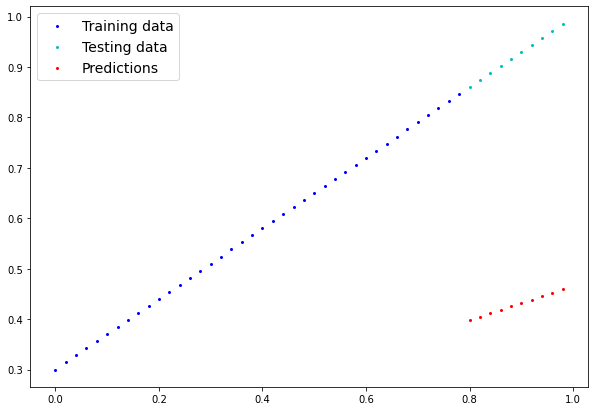

In [ ]:
plot_predictions(predictions=y_preds)

In [ ]:
loss_function = nn.L1Loss()
optimizer = torch.optim.SGD(params = model_0.parameters(), lr = 1e-3)

In [ ]:
torch.manual_seed(42)

epochs = 1000

train_loss_values = []
test_loss_values = []
epoch_counts = []


for epoch in range(epochs):
  
  model_0.train()
  y_pred = model_0(X_train)
  loss = loss_function(y_pred, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  
  model_0.eval()

  with torch.inference_mode():
    test_pred = model_0(X_test)
    test_loss = loss_function(test_pred, y_test)
  
  if epoch % 5 == 0:
    epoch_counts.append(epoch)
    train_loss_values.append(loss.detach().numpy())
    test_loss_values.append(test_loss.detach().numpy())
    print(f"Epoch: {epoch},Train MAE: {loss}, Test MAE: {test_loss}")

Epoch: 0,Train MAE: 0.02435956709086895, Test MAE: 0.05690721794962883
Epoch: 5,Train MAE: 0.02418813668191433, Test MAE: 0.05649354308843613
Epoch: 10,Train MAE: 0.024016480892896652, Test MAE: 0.05607985332608223
Epoch: 15,Train MAE: 0.023844534531235695, Test MAE: 0.05566616728901863
Epoch: 20,Train MAE: 0.02367258258163929, Test MAE: 0.055252473801374435
Epoch: 25,Train MAE: 0.023500746116042137, Test MAE: 0.054907459765672684
Epoch: 30,Train MAE: 0.023329313844442368, Test MAE: 0.054493773728609085
Epoch: 35,Train MAE: 0.023157883435487747, Test MAE: 0.05408008024096489
Epoch: 40,Train MAE: 0.022986043244600296, Test MAE: 0.05366641283035278
Epoch: 45,Train MAE: 0.02281409129500389, Test MAE: 0.053252726793289185
Epoch: 50,Train MAE: 0.022642139345407486, Test MAE: 0.05283904820680618
Epoch: 55,Train MAE: 0.02247048355638981, Test MAE: 0.05249400809407234
Epoch: 60,Train MAE: 0.02229905314743519, Test MAE: 0.05208033323287964
Epoch: 65,Train MAE: 0.022127559408545494, Test MAE: 0.

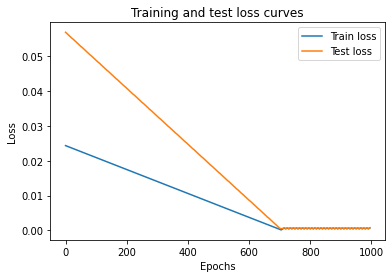

In [ ]:
plt.plot(epoch_counts, train_loss_values, label="Train loss")
plt.plot(epoch_counts, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [ ]:
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('weights', tensor([0.6994])), ('bias', tensor([0.2998]))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


In [ ]:
model_0.eval() # set the model to evaluation mode

with torch.inference_mode():
  y_preds = model_0(X_test)
y_preds

tensor([0.8593, 0.8733, 0.8873, 0.9013, 0.9152, 0.9292, 0.9432, 0.9572, 0.9712,
        0.9852])

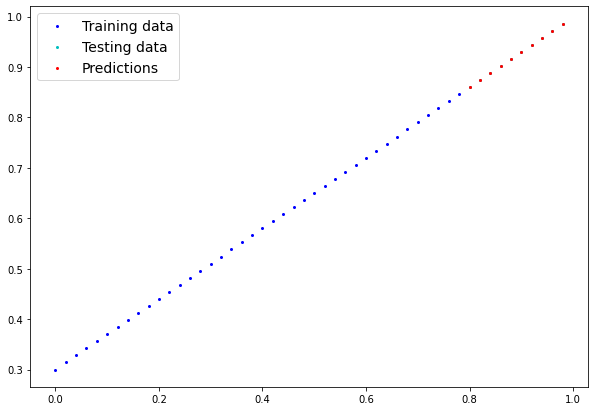

In [ ]:
plot_predictions(predictions=y_preds)

In [ ]:
from pathlib import Path

# 1. Create models directory 
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path 
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict 
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


In [ ]:
# Check the saved file path
!ls -l models/01_pytorch_workflow_model_0.pth

-rw-r--r-- 1 root root 1063 Dec  6 01:37 models/01_pytorch_workflow_model_0.pth
